<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

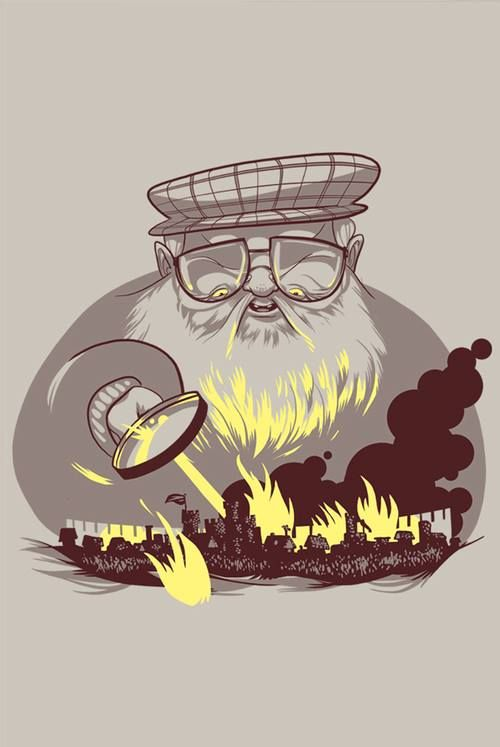

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
# !gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 
# !gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v 

### **Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data_init = pd.read_csv("game_of_thrones_train.csv", index_col = "S.No")

df = data_init # чтобы не изменять изначальный датасет 
df.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


### **Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

#### Какие признаки имеют много NULL элементов и не сможем восстановить медианой или средним?
Такими являются mother, father, heir, spouse.

Однако, isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse уже более информативные, пусть и тоже пусты. Будем заполнять пропуски -1 (просто так обозначим nan, сделаем это немного позже)

In [5]:
df = df.drop(columns = ["mother", "father", "heir", "spouse"])

#### dateOfBirth и age

Эти признаки говорят примерно об одном и том же. Посмотрим, на их зависимость и влияние на целевую переменную

Корреляция Cпирмана (мера монотонной зависимости): -0.7748300209647241
Корреляция Пирсона (мера линейной зависимости): -0.5045659061377608


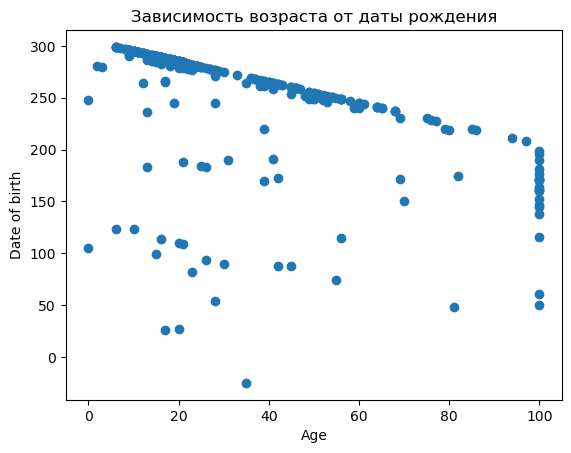

In [6]:
print(
    f"Корреляция Cпирмана (мера монотонной зависимости): {df['age'].corr(df['dateOfBirth'], 'spearman')}"
)
print(
    f"Корреляция Пирсона (мера линейной зависимости): {df['age'].corr(df['dateOfBirth'])}"
)


plt.style.use('default')
plt.scatter(df.age, df.dateOfBirth)
plt.title("Зависимость возраста от даты рождения")
plt.xlabel("Age")
plt.ylabel("Date of birth")
plt.show()

Корреляция высока. Причем, значения возраста ограничиваются 100 годами, а dateOfBirth не имеет такого ограничения. Поэтому dateOfBirth более информативный.

Рассмотрим их влияние на целевую переменную.


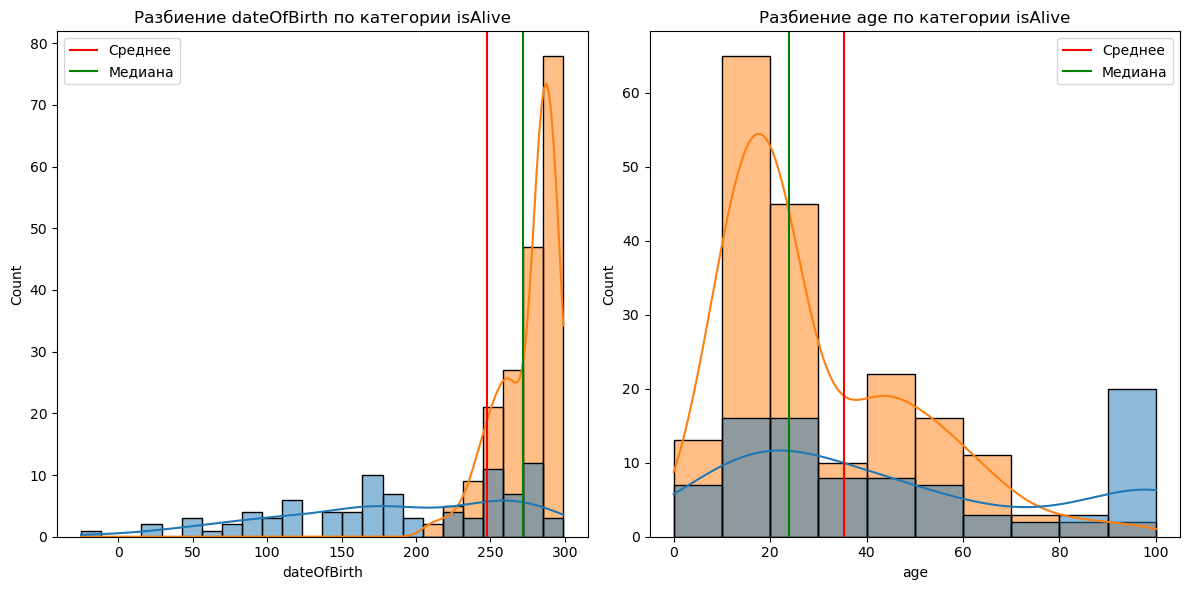

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Первый график: dateOfBirth
sns.histplot(data=df, x='dateOfBirth', kde=True, hue='isAlive', ax=axes[0])
axes[0].set_title("Разбиение dateOfBirth по категории isAlive")
mean_line = axes[0].axvline(df["dateOfBirth"].mean(), color="red", label='Среднее')
median_line = axes[0].axvline(df["dateOfBirth"].median(), color="green", label='Медиана')
axes[0].legend()  # Добавляем легенду

# Второй график: age
sns.histplot(data=df, x='age', kde=True, hue='isAlive', ax=axes[1])
axes[1].set_title("Разбиение age по категории isAlive")
mean_line = axes[1].axvline(df["age"].mean(), color="red", label='Среднее')
median_line = axes[1].axvline(df["age"].median(), color="green", label='Медиана')
axes[1].legend()  # Добавляем легенду

# Отображаем графики
plt.tight_layout()
plt.show()

По виду графиков заметно, что распределения отличаются в зависимости от категории isAlive. Поэтому нужно оставить хотя бы один такой признак. 

Логически, может быть следующая ситуация: персонажу 20 лет, родился он 300 лет назад. Тогда этот персонаж никак не мог дожить до текущих дней книги. Соответственно, стоит оставить оба признака.

Чем будем заполнять: медианой или средним? Будем смотреть на dateOfBirth (ситуация аналогична для age). В правой части происходит неопределенность, может быть как мертвый персонаж, так и живой. Если же персонаж находится в левой части, то он оооочень вероятно, что мертв. Поэтому будем заполнять Медианой, так как она находится правее среднего.

In [8]:
age = df['age'].median()
df["age"] = df["age"].fillna(age)

dateOfBirth_mean = df['dateOfBirth'].median()
df["dateOfBirth"] = df["dateOfBirth"].fillna(dateOfBirth_mean)

#### house, title, culture

Заполним пропуски просто через "nan".

In [9]:
df["house"] = df["house"].fillna("nan")

df["title"] = df["title"].fillna("nan")

df["culture"] = df["culture"].fillna("nan")

In [10]:
# Дозаполним остальные все остальное -1 
df.fillna(value = -1, inplace=True)

### **Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [11]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'nan': ['nan']
}


def func(y):
    x = y["culture"]
    for c in cult:
        if x in cult[c]:
            return c
    return(x)


df = pd.concat(
            [df, pd.DataFrame(
                {"isPopular": df.apply(
                    lambda x: True if x["popularity"] > 0.5 else False, axis = 1
                ),
                "boolDeadRelations": df.apply(
                    lambda x: True if x["numDeadRelations"] > 0 else False, axis = 1
                ),
                "cult": df.apply(
                    func, axis = 1
                )
                }
            )], axis = 1
        )

#### **Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

Некоторые столбцы уже удалили. Продолжим это делать.

name, кажется, не очень информативный. culture уже не нужен, так как есть cult. Аналогично numDeadRelations. Но isPopular я бы все таки не вставлял, а оставил бы popularity. Он более информативный, хуже точно не будет.

In [12]:
df.drop(columns=["name", "culture", "isPopular", "numDeadRelations"], inplace = True)

### **Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Датасет не является сбалансированным по классам. Целевая переменная является категориальной

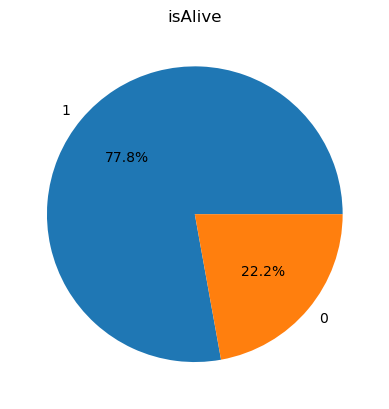

In [13]:
tmp = pd.value_counts(df["isAlive"])
plt.pie(tmp, autopct='%1.1f%%', labels=tmp.index)
plt.title("isAlive");

### **Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

#### title

In [14]:
title_counts = pd.value_counts(df["title"])
title_counts.head(20)

title
nan                                    840
Ser                                    306
Maester                                 29
Archmaester                             21
Lord                                    19
Septon                                  16
Winterfell                              15
Lady                                    10
King in the North                        9
Princess                                 9
Septa                                    9
Cupbearer                                8
Lord Commander of the Night's Watch      8
Prince                                   7
Grand Maester                            6
Khal                                     5
Wisdom                                   5
Prince of Dragonstone                    4
King-Beyond-the-Wall                     4
Lord of the Tides                        3
Name: count, dtype: int64

Преобразуем все титулы, которых менее 10 к одному признаку титлу "other"

In [15]:
df["title"] = df["title"].apply(lambda x: x if title_counts[x] > 10 else "other")
pd.value_counts(df["title"])

title
nan            840
other          311
Ser            306
Maester         29
Archmaester     21
Lord            19
Septon          16
Winterfell      15
Name: count, dtype: int64

#### house
Аналогично

In [16]:
house_counts = pd.value_counts(df["house"])
house_counts.head(20)

house
nan                   381
House Frey             89
Night's Watch          88
House Stark            56
House Targaryen        40
House Lannister        36
House Tyrell           33
House Greyjoy          30
House Osgrey           20
Faith of the Seven     15
House Hightower        12
House Botley           12
House Arryn            11
House Martell          11
House Crakehall        10
House Florent          10
House Bracken           9
House Waynwood          9
House Wylde             8
House Westerling        8
Name: count, dtype: int64

In [17]:
df["house"] = df["house"].apply(lambda x: x if house_counts[x] > 10 else "other")
pd.value_counts(df["house"])

house
other                 723
nan                   381
House Frey             89
Night's Watch          88
House Stark            56
House Targaryen        40
House Lannister        36
House Tyrell           33
House Greyjoy          30
House Osgrey           20
Faith of the Seven     15
House Botley           12
House Hightower        12
House Arryn            11
House Martell          11
Name: count, dtype: int64

#### cult

Аналогично

In [18]:
cult_counts = pd.value_counts(df["cult"])
cult_counts.head(20)

cult
nan                    1069
Northmen                103
Ironborn                 91
Free Folk                46
Braavosi                 39
Valyrian                 28
Ghiscari                 17
Dornish                  17
Dothraki                 17
Reach                    13
Vale mountain clans      12
Rivermen                 10
Valemen                  10
Westerman                 8
Free folk                 7
Tyroshi                   6
Qartheen                  5
Westermen                 5
Summer Isles              4
Stormlands                4
Name: count, dtype: int64

In [19]:
df["cult"] = df["cult"].apply(lambda x: x if cult_counts[x] > 10 else "other")
pd.value_counts(df["cult"])    

cult
nan                    1069
other                   105
Northmen                103
Ironborn                 91
Free Folk                46
Braavosi                 39
Valyrian                 28
Dornish                  17
Dothraki                 17
Ghiscari                 17
Reach                    13
Vale mountain clans      12
Name: count, dtype: int64

### **Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   dateOfBirth        1557 non-null   float64
 3   house              1557 non-null   object 
 4   book1              1557 non-null   int64  
 5   book2              1557 non-null   int64  
 6   book3              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   book5              1557 non-null   int64  
 9   isAliveMother      1557 non-null   float64
 10  isAliveFather      1557 non-null   float64
 11  isAliveHeir        1557 non-null   float64
 12  isAliveSpouse      1557 non-null   float64
 13  isMarried          1557 non-null   int64  
 14  isNoble            1557 non-null   int64  
 15  age                1557 non-null   float64
 16  popularity         1557 non-n

In [21]:
df_quantitative_colnames = ["dateOfBirth", "age", "popularity"]
df_categorical_colnames = df.drop(columns=df_quantitative_colnames).columns.tolist()

for category in df_categorical_colnames:
    category_means = df.groupby(category)['isAlive'].mean()
    print(category_means)
    print()

title
Archmaester    1.000000
Lord           0.684211
Maester        0.896552
Septon         0.750000
Ser            0.774510
Winterfell     0.666667
nan            0.800000
other          0.710611
Name: isAlive, dtype: float64

male
0    0.852433
1    0.727174
Name: isAlive, dtype: float64

house
Faith of the Seven    0.866667
House Arryn           0.636364
House Botley          0.833333
House Frey            0.898876
House Greyjoy         0.600000
House Hightower       0.750000
House Lannister       0.694444
House Martell         0.909091
House Osgrey          0.750000
House Stark           0.767857
House Targaryen       0.300000
House Tyrell          0.939394
Night's Watch         0.568182
nan                   0.803150
other                 0.806362
Name: isAlive, dtype: float64

book1
0    0.797166
1    0.662037
Name: isAlive, dtype: float64

book2
0    0.794651
1    0.745098
Name: isAlive, dtype: float64

book3
0    0.771751
1    0.787202
Name: isAlive, dtype: float64

book4
0   

Среднее по выживаемости отличается для всех категорий и всех категориальных переменных

In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

unprocessed_cat_features = ["title", "house", "cult"]

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=df.index)

In [23]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
df_encoded

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,...,cult_Dothraki,cult_Free Folk,cult_Ghiscari,cult_Ironborn,cult_Northmen,cult_Reach,cult_Vale mountain clans,cult_Valyrian,cult_nan,cult_other
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,208.0,1,1,1,1,1,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,272.0,0,0,0,1,0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,82.0,0,0,0,0,0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0,276.0,0,0,0,1,0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,272.0,1,0,1,1,0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1554,0,272.0,1,1,0,0,0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1555,1,272.0,0,1,1,1,1,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### **Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [24]:
X = df_encoded.drop(columns = ["isAlive"])
y = df_encoded["isAlive"]

### **Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=44)


from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

## **1. Final**. Объединение всех предыдущих шагов в один класс

Подготовим класс, который будет похож на то, что сделано в Sklearn. Он будет принимать train датасет и преобразовывать на его основе другие данные (например, test датасет)

In [27]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np


# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'nan': ['nan']
}


def func(y):
    x = y["culture"]
    for c in cult:
        if x in cult[c]:
            return c
    return(x)


class PrepareData:

    def __init__(self):
        pass

    def fit(self, data_frame: pd.DataFrame):
        df = data_frame

        self.drop_cols = ["mother", "father", "heir", "spouse"]

        df = df.drop(columns = self.drop_cols)

        # df = df.drop(columns = ["age"])
        self.age = df['age'].median()
        df["age"] = df["age"].fillna(self.age)
        

        self.dateOfBirth_mean = df['dateOfBirth'].median()
        df["dateOfBirth"] = df["dateOfBirth"].fillna(self.dateOfBirth_mean)
        

        df["name"] = df["name"].apply(lambda x: x.split()[-1])
        
        df["house"] = df["house"].fillna("nan")

        df["title"] = df["title"].fillna("nan")

        df["culture"] = df["culture"].fillna("nan")

        df = pd.concat(
            [df, pd.DataFrame(
                {"isPopular": df.apply(
                    lambda x: True if x["popularity"] > 0.5 else False, axis = 1
                ),
                "boolDeadRelations": df.apply(
                    lambda x: True if x["numDeadRelations"] > 0 else False, axis = 1
                ),
                "cult": df.apply(
                    func, axis = 1
                )
                }
            )], axis = 1
        )

        self.drop_cols2 = ["name", "culture", "isPopular", "numDeadRelations"]
        df.drop(columns=self.drop_cols2, inplace = True)

        title_counts = pd.value_counts(df["title"])
        df["title"] = df["title"].apply(lambda x: x if title_counts[x] > 10 else "other")
        self.title = pd.unique(df["title"])

        house_counts = pd.value_counts(df["house"])
        # print(house_counts[1:20])
        df["house"] = df["house"].apply(lambda x: x if house_counts[x] > 10 else "other")
        self.house = pd.unique(df["house"])

        cult_counts = pd.value_counts(df["cult"])
        df["cult"] = df["cult"].apply(lambda x: x if cult_counts[x] > 10 else "other")
        self.cult = pd.unique(df["cult"])

        df.fillna(value = -1, inplace=True)

        encoder = OneHotEncoder(sparse_output=False)
        unprocessed_cat_features = ["title", "house", "cult", "isAliveSpouse"]
        encoder = encoder.fit(df[unprocessed_cat_features])
        one_hot_encoded = encoder.transform(df[unprocessed_cat_features])
        one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=df.index)
        self.encoder = encoder

        
        df_encoded = pd.concat([df, one_hot_df], axis=1)
        df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

        
        
        return df_encoded
    

    def transform(self, data_frame: pd.DataFrame):
        df = data_frame

        df = df.drop(columns = self.drop_cols)

        # df = df.drop(columns = ["age"])
        df["age"] = df["age"].fillna(self.age)
        
        df["dateOfBirth"] = df["dateOfBirth"].fillna(self.dateOfBirth_mean)

        df["name"] = df["name"].apply(lambda x: x.split()[-1])
        # df["house"] = df.apply(
        #     lambda x: x["house"].split()[-1] if (not pd.isna(x["house"])) else x["name"], axis = 1
        # )
        df["house"] = df["house"].fillna("nan")

        df["title"] = df["title"].fillna("nan")

        df["culture"] = df["culture"].fillna("nan")

        df = pd.concat(
            [df, pd.DataFrame(
                {"isPopular": df.apply(
                    lambda x: True if x["popularity"] > 0.5 else False, axis = 1
                ),
                "boolDeadRelations": df.apply(
                    lambda x: True if x["numDeadRelations"] > 0 else False, axis = 1
                ),
                "cult": df.apply(
                    func, axis = 1
                )
                }
            )], axis = 1
        )

        df.drop(columns=self.drop_cols2, inplace = True)

        df["title"] = df["title"].apply(lambda x: x if x in self.title else "other")

        df["house"] = df["house"].apply(lambda x: x if x in self.house else "other")

        df["cult"] = df["cult"].apply(lambda x: x if x in self.cult else "other")

        df.fillna(value = -1, inplace=True)

        unprocessed_cat_features = ["title", "house", "cult", "isAliveSpouse"]
        one_hot_encoded = self.encoder.transform(df[unprocessed_cat_features])
        one_hot_df = pd.DataFrame(one_hot_encoded, columns=self.encoder.get_feature_names_out(unprocessed_cat_features), index=df.index)


        
        df_encoded = pd.concat([df, one_hot_df], axis=1)
        df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)
        
        return df_encoded


In [28]:
from sklearn import preprocessing


df_train, df_test = train_test_split(data_init, shuffle=True, test_size=0.2, random_state=44)

data_preparer = PrepareData()

df_train_prepared = data_preparer.fit(df_train)
X_train = df_train_prepared.drop(columns = ["isAlive"]).values
y_train = df_train_prepared["isAlive"].values



df_test_prepared = data_preparer.transform(df_test)
X_test = df_test_prepared.drop(columns = ["isAlive"]).values
y_test = df_test_prepared["isAlive"].values


# для многих алгоритмов нужна стандартизация данных 
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [29]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [30]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [31]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [32]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


Сделаем это после части 3. Сразу будем тренировать и оценивать все модели

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [33]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [34]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7788


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [35]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7788


In [ ]:
def save_result(clf):
    data_submission = pd.read_csv("game_of_thrones_test.csv", index_col = "S.No")

    data_submission_prepared = data_preparer.transform(data_submission)

    X_submission = data_submission_prepared.values

    X_submission_scaled = scaler.transform(X_submission)

    submission = pd.read_csv("submission.csv", index_col='S.No')

    submission["isAlive"] = clf.predict(X_submission_scaled)

    submission.to_csv("new_submission.csv", index=False)

Выберите лучшую модель.

## **Часть 4.** Тренировка и оценка моделей

Добавим другие метрики для оценки моделей. Также будем некоторые модели перебирать по сетке параметров с кроссвалидацией, чтобы найти лучшую.

### Логистическая регрессия

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [38]:
log_reg = LogisticRegression()

# Определение сетки параметров для GridSearch
param_grid = {
    "class_weight":  ['balanced', None],
    "C": [0.5, 1, 2],
    "penalty": ['l2']
}

# n_jobs можно заменить на меньшее. В моем процессоре 8 ядер, поэтому 
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


grid_search.fit(np.vstack((X_train_scaled, X_test_scaled)), np.concatenate((y_train, y_test)))

best_log_reg = grid_search.best_estimator_

clf = best_log_reg

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy : 0.8462
Precision : 0.8571
Roc auc score : 0.6989


In [39]:
save_result(clf)

Эта моделька выдала на степике:

`Accuracy вашего решения равен 0.7249357326478149.`

### AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# Создание базового классификатора (дерева решений)
base_est = DecisionTreeClassifier()

# Создание AdaBoostClassifier с базовым классификатором
adaboost = AdaBoostClassifier(estimator=base_est, random_state=43)

# Определение сетки параметров для GridSearch
param_grid = {
    'estimator__max_depth': [2, 3, 4, 5],  # Параметры для DecisionTreeClassifier
    'estimator__min_samples_split': [2, 5],
    'n_estimators': [100, 200, 300, 400],  # Параметры для AdaBoostClassifier
    'learning_rate': [0.5, 1.0]
}

# n_jobs можно заменить на меньшее. В моем процессоре 8 ядер, поэтому 
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


grid_search.fit(np.vstack((X_train_scaled, X_test_scaled)), np.concatenate((y_train, y_test)))

best_adaboost = grid_search.best_estimator_

clf = best_adaboost

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Accuracy : 0.9071
Precision : 0.9115
Roc auc score : 0.8210


In [41]:
save_result(clf)

Эта моделька выдала на степике:

`Accuracy вашего решения равен 0.7686375321336761.`

### RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier


rand_forest = RandomForestClassifier()

# Определение сетки параметров для GridSearch
param_grid = {
    "class_weight": ['balanced', 'balanced_subsample', None],
    'max_depth': [3, 4, 5, None], 
    'n_estimators': [100, 200, 300, 400]
}

# n_jobs можно заменить на меньшее. В моем процессоре 8 ядер, поэтому 
grid_search = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


grid_search.fit(np.vstack((X_train_scaled, X_test_scaled)), np.concatenate((y_train, y_test)))

best_rand_forest = grid_search.best_estimator_

clf = best_rand_forest

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Accuracy : 0.9583
Precision : 0.9873
Roc auc score : 0.9577


In [43]:
best_rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
save_result(clf)

Эта моделька выдала на степике:

`Accuracy вашего решения равен 0.7352185089974294.`

Не вышло малеха, переобучилась.

### GaussianProcess

Эту модельку не знаю, так что перебирать её по сетке параметров не буду

In [45]:
from sklearn.gaussian_process import GaussianProcessClassifier


gauss_process = GaussianProcessClassifier()

# Определение сетки параметров для GridSearch
param_grid = {
}

# n_jobs можно заменить на меньшее. В моем процессоре 8 ядер, поэтому 
grid_search = GridSearchCV(estimator=gauss_process, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


grid_search.fit(np.vstack((X_train_scaled, X_test_scaled)), np.concatenate((y_train, y_test)))

best_gauss_process = grid_search.best_estimator_

clf = best_gauss_process

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy : 0.9391
Precision : 0.9375
Roc auc score : 0.8779


In [46]:
save_result(clf)

Эта моделька выдала на степике:

`Accuracy вашего решения равен 0.6786632390745502.`

Не вышло малеха, переобучилась.

### Наивный Байесовский классификатор

In [47]:
from sklearn.naive_bayes import GaussianNB


gauss_nb = GaussianNB()

# Определение сетки параметров для GridSearch
param_grid = {
}

# n_jobs можно заменить на меньшее. 
grid_search = GridSearchCV(estimator=gauss_process, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


grid_search.fit(np.vstack((X_train_scaled, X_test_scaled)), np.concatenate((y_train, y_test)))

best_gauss_nb = grid_search.best_estimator_

clf = best_gauss_nb

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy : 0.9391
Precision : 0.9375
Roc auc score : 0.8779


In [48]:
save_result(clf)

### K ближайших соседей

In [49]:
from sklearn.neighbors import KNeighborsClassifier


k_n = KNeighborsClassifier()

# Определение сетки параметров для GridSearch
param_grid = {
     "n_neighbors": [2, 3, 5, 10, 15, 20, 30],
     "weights": ['uniform', 'distance']
}

# n_jobs можно заменить на меньшее. 
grid_search = GridSearchCV(estimator=k_n, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


grid_search.fit(np.vstack((X_train_scaled, X_test_scaled)), np.concatenate((y_train, y_test)))

best_k_n = grid_search.best_estimator_

clf = best_k_n

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuracy : 0.8301
Precision : 0.8393
Roc auc score : 0.6575


In [50]:
save_result(clf)

Эта моделька выдала на степике:

`Accuracy вашего решения равен 0.6632390745501285. Это дает вам 4.0 баллов. Если вы хотите больше баллов, можете попробовать еще раз.`


### SVC

In [51]:
from sklearn.svm import SVC


svc = SVC()

# Определение сетки параметров для GridSearch
param_grid = {
     "C": [0.5, 1, 2],
     "kernel":['linear', 'poly', 'rbf', 'sigmoid']
}

# n_jobs можно заменить на меньшее. 
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


grid_search.fit(np.vstack((X_train_scaled, X_test_scaled)), np.concatenate((y_train, y_test)))

best_svc = grid_search.best_estimator_

clf = best_svc

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy : 0.8365
Precision : 0.8288
Roc auc score : 0.6356


In [52]:
save_result(clf)

Эта моделька выдала на степике:

`Accuracy вашего решения равен 0.7300771208226221. Это дает вам 4.0 баллов. Если вы хотите больше баллов, можете попробовать еще раз.`


## **Итог**

**ТОП:**
1) AdaBoost
2) RandomForest
3) SVC
4) LogisticRegression
5) GaussianProcess
6) GaussianNB